<a href="https://colab.research.google.com/github/YoonJiHwan98/Sejong_Univ_3-2/blob/main/sentiment_bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import urllib.request
import matplotlib.font_manager as fm


In [ ]:
# import os
# os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
# os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes',labelsize = 20)
mpl.rc('xtick',labelsize = 20)
mpl.rc('ytick',labelsize = 20)

In [ ]:
df_all = pd.read_csv('/content/drive/MyDrive/기업 뉴스 감성분석/datasets/sentiment/News_sentiment_data.csv',encoding = 'cp949')
df_all

,제목,labels
0,"Gran에 따르면, 그 회사는 회사가 성장하고 있는 곳이지만, 모든 생산을 러시아로...",neutral
1,테크노폴리스는 컴퓨터 기술과 통신 분야에서 일하는 회사들을 유치하기 위해 10만 평...,neutral
2,"국제 전자산업 회사인 엘코텍은 탈린 공장에서 수십 명의 직원을 해고했으며, 이전의 ...",negative
3,새로운 생산공장으로 인해 회사는 예상되는 수요 증가를 충족시킬 수 있는 능력을 증가...,positive
4,"2009-2012년 회사의 업데이트된 전략에 따르면, Basware는 20% - 4...",positive
...,...,...
12477,코로나 충격에 따른 근로 시간 감소_ 과거 위기의 5배,nagative
12478,7월 사업체종사자 13만8천명 감소 코로나19 여파에 5개월째 감소,nagative
12479,한치 앞도 안보인다..채용문 꽁꽁 닫는 카드사,nagative
12480,토스_ 고객 상담직 신입 및 경력 30명 공개 채용,positive


In [ ]:
df_only_hire = pd.read_csv('/content/drive/MyDrive/기업 뉴스 감성분석/datasets/sentiment/hire_article_only.csv',encoding = 'cp949')
df_only_hire

,제목,labels
0,서울시 ICT뉴딜일자리 성과 톡톡 참여자 절반 취업 성공,positive
1,한은 최저임금 인상_ 생산성은 향상 고용은 일부 악영향,nagative
2,"노동연구원 ""내년 취업자 증가 13만여명 최저임금 영향 주의""",nagative
3,절반 내년 신입사원 채용 없다,nagative
4,온라인거래 증가로 일자리 7만개 사라져,nagative
...,...,...
7631,코로나 충격에 따른 근로 시간 감소_ 과거 위기의 5배,nagative
7632,7월 사업체종사자 13만8천명 감소 코로나19 여파에 5개월째 감소,nagative
7633,한치 앞도 안보인다..채용문 꽁꽁 닫는 카드사,nagative
7634,토스_ 고객 상담직 신입 및 경력 30명 공개 채용,positive


In [ ]:
df_all_PN = pd.read_csv('/content/drive/MyDrive/기업 뉴스 감성분석/datasets/sentiment/hire_article_finance_PN.csv',encoding = 'cp949')
df_all_PN

,제목,labels
0,서울시 ICT뉴딜일자리 성과 톡톡 참여자 절반 취업 성공,positive
1,한은 최저임금 인상_ 생산성은 향상 고용은 일부 악영향,nagative
2,"노동연구원 ""내년 취업자 증가 13만여명 최저임금 영향 주의""",nagative
3,절반 내년 신입사원 채용 없다,nagative
4,온라인거래 증가로 일자리 7만개 사라져,nagative
...,...,...
8282,헬싱키 톰슨 파이낸셜 - 카고텍의 주가는 화물 취급 그룹이 4월부터 6월까지 3개월...,negative
8283,런던 마켓워치 -- 은행주의 반등이 FTSE 100지수의 약세를 상쇄하지 못하면서 ...,negative
8284,"영업이익은 2007년 68.8 mn에서 35.4 mn으로 떨어졌으며, 선박 판매 이...",negative
8285,페이퍼 부문 순매출은 2008년 2분기 241.1 mn에서 2009년 2분기 221...,negative


In [ ]:
df_only_hire_PN = pd.read_csv('/content/drive/MyDrive/기업 뉴스 감성분석/datasets/sentiment/hire_article_all_only_PN.csv',encoding = 'cp949')
df_only_hire_PN

,제목,labels
0,서울시 ICT뉴딜일자리 성과 톡톡 참여자 절반 취업 성공,positive
1,한은 최저임금 인상_ 생산성은 향상 고용은 일부 악영향,nagative
2,"노동연구원 ""내년 취업자 증가 13만여명 최저임금 영향 주의""",nagative
3,절반 내년 신입사원 채용 없다,nagative
4,온라인거래 증가로 일자리 7만개 사라져,nagative
...,...,...
6315,코로나 충격에 따른 근로 시간 감소_ 과거 위기의 5배,nagative
6316,7월 사업체종사자 13만8천명 감소 코로나19 여파에 5개월째 감소,nagative
6317,한치 앞도 안보인다..채용문 꽁꽁 닫는 카드사,nagative
6318,토스_ 고객 상담직 신입 및 경력 30명 공개 채용,positive


In [ ]:
import re

In [ ]:
def data_text_labels (df):

    labels = df['labels'].map({'positive' : 0 , 'negative' : 1,'nagative' : 1, 'neutral' : 2})
    texts = df['제목'].apply(lambda x : re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"\n\]\[\>]','',x))

    return texts, labels

In [ ]:
texts_only_hire_PN,labels_only_hire_PN = data_text_labels(df_only_hire_PN)
texts_all_PN,labels_all_PN = data_text_labels(df_all_PN)
texts_only_hire,labels_only_hire = data_text_labels(df_only_hire)
texts_all,labels_all = data_text_labels(df_all)

In [ ]:
texts_only_hire_PN

0             서울시 ICT뉴딜일자리 성과 톡톡 참여자 절반 취업 성공
1              한은 최저임금 인상 생산성은 향상 고용은 일부 악영향 
2            노동연구원 내년 취업자 증가 13만여명 최저임금 영향 주의
3                           절반 내년 신입사원 채용 없다 
4                       온라인거래 증가로 일자리 7만개 사라져
                        ...                  
6315            코로나 충격에 따른 근로 시간 감소 과거 위기의 5배
6316    7월 사업체종사자 13만8천명 감소 코로나19 여파에 5개월째 감소
6317                  한치 앞도 안보인다채용문 꽁꽁 닫는 카드사
6318              토스 고객 상담직 신입 및 경력 30명 공개 채용
6319                 토스 연봉 3000만원 고객 상담직 공개채용
Name: 제목, Length: 6320, dtype: object

In [ ]:
labels_all.value_counts()

0    4513
2    4195
1    3774
Name: labels, dtype: int64

In [ ]:
import re

In [ ]:
# 문장이 가장 긴 길이는 195 이다.

max_len = []
for i in texts_all:
    max_len.append(int(len(i)))

max(max_len)

189

In [ ]:
max_len = []
for i in texts_only_hire:
    max_len.append(int(len(i)))

max(max_len)

67

In [ ]:
from sklearn.model_selection import train_test_split

X_train_only_hire_PN, X_test_only_hire_PN, y_train_only_hire_PN, y_test_only_hire_PN = train_test_split(texts_only_hire_PN, labels_only_hire_PN, random_state=42, test_size=0.2, stratify=labels_only_hire_PN)
X_train_all_PN, X_test_all_PN, y_train_all_PN, y_test_all_PN = train_test_split(texts_all_PN, labels_all_PN, random_state=42, test_size=0.2, stratify=labels_all_PN)
X_train_only_hire, X_test_only_hire, y_train_only_hire, y_test_only_hire = train_test_split(texts_only_hire, labels_only_hire, random_state=42, test_size=0.2, stratify=labels_only_hire)
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(texts_all, labels_all, random_state=42, test_size=0.2, stratify=labels_all)

In [ ]:
X_train_only_hire_PN[0]

'서울시 ICT뉴딜일자리 성과 톡톡 참여자 절반 취업 성공'

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 6.2 MB/s 
     |████████████████████████████████| 7.6 MB 49.8 MB/s 
     |████████████████████████████████| 182 kB 68.8 MB/s 


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Found GPU at: /device:GPU:0


## 데이터 토큰화

In [ ]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel, BertConfig,TFBertForSequenceClassification
import warnings
warnings.filterwarnings('ignore')
import torch
from torch.nn.utils.rnn import pad_sequence

Bert Config 생성

In [ ]:
my_config = BertConfig.from_pretrained(
    'bert-base-multilingual-cased',
    num_labels=3,
    output_hidden_states=True,
    attention_probs_dropout_prob = 0.2,
    hidden_dropout_prob = 0.2
)

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

In [ ]:
#토크나이저 불러오기
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

model = TFBertForSequenceClassification.from_pretrained(
    "bert-base-multilingual-cased", # Use the 12-layer BERT model, with an uncased vocab.
    config=my_config

# The number of out put labels--2 for binary classification.
#                     # You can increase this for multi-class tasks.
#     output_attentions = False, # Whether the model returns attentions weights.
#     output_hidden_states = False, # Whether the model returns all hidden-states.
)

Downloading:   0%|          | 0.00/996k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.08G [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


긍정부정 Config 생성

In [ ]:
my_config_PN = BertConfig.from_pretrained(
    'bert-base-multilingual-cased',
    num_labels=2,
    output_hidden_states=True,
    attention_probs_dropout_prob = 0.2,
    hidden_dropout_prob = 0.2
)

In [ ]:
model_PN = TFBertForSequenceClassification.from_pretrained(
    "bert-base-multilingual-cased", # Use the 12-layer BERT model, with an uncased vocab.
    config=my_config_PN

# The number of out put labels--2 for binary classification.
#                     # You can increase this for multi-class tasks.
#     output_attentions = False, # Whether the model returns attentions weights.
#     output_hidden_states = False, # Whether the model returns all hidden-states.
)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Encoding

In [ ]:
def encode(data, tokenizer):
    input_ids = []
    attention_masks = []
    token_type_ids = []

    for text in data:
        tokenized_text = tokenizer.encode_plus(text,
                                            max_length=128,
                                            add_special_tokens = True,
                                            pad_to_max_length=True,
                                            return_attention_mask=True,
                                            truncation=True)

        input_ids.append(tokenized_text['input_ids'])
        attention_masks.append(tokenized_text['attention_mask'])
        token_type_ids.append(tokenized_text['token_type_ids'])

    return input_ids, attention_masks, token_type_ids

### Token 화

In [ ]:
# 뉴스 제목 기사만 있는 학습데이터 토큰화
train_input_ids_only_hire_PN, train_attention_masks_only_hire_PN, train_token_type_ids_only_hire_PN = encode(X_train_only_hire_PN, tokenizer)

#테스트데이터 토큰화
test_input_ids_only_hire_PN, test_attention_masks_only_hire_PN, test_token_type_ids_only_hire_PN = encode(X_test_only_hire_PN, tokenizer)


In [ ]:
#전체 학습데이터 토큰화
train_input_ids_all_PN, train_attention_masks_all_PN, train_token_type_ids_all_PN = encode(X_train_all_PN, tokenizer)

#테스트데이터 토큰화
test_input_ids_all_PN, test_attention_masks_all_PN, test_token_type_ids_all_PN = encode(X_test_all_PN, tokenizer)


In [ ]:
#긍정부정만 있는 뉴스 제목 기사 학습데이터 토큰화
train_input_ids_only_hire, train_attention_masks_only_hire, train_token_type_ids_only_hire = encode(X_train_only_hire, tokenizer)

#테스트데이터 토큰화
test_input_ids_only_hire, test_attention_masks_only_hire, test_token_type_ids_only_hire = encode(X_test_only_hire, tokenizer)


In [ ]:
# 긍정부정만 있는 전체 학습데이터 토큰화
train_input_ids_all, train_attention_masks_all, train_token_type_ids_all = encode(X_train_all, tokenizer)

#테스트데이터 토큰화
test_input_ids_all, test_attention_masks_all, test_token_type_ids_all = encode(X_test_all, tokenizer)


In [ ]:
print(train_input_ids_only_hire_PN[0])

[101, 9414, 24017, 27506, 9641, 13764, 12692, 8910, 21386, 35979, 9248, 93200, 65096, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
print(tokenizer.decode(train_input_ids_only_hire_PN[0]))

[CLS] 상생형 일자리 군산에도 만들어진다 [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


In [ ]:
y_train_only_hire_PN

2872    0
465     1
3444    0
2083    0
395     0
       ..
3041    0
5386    1
5788    1
2798    0
354     0
Name: labels, Length: 5056, dtype: int64

## 학습 데이터로 encoding

In [ ]:
#딕셔너리 형태로 변환해서 출력
def map_example_to_dict(input_ids, attention_masks, token_type_ids, label):
    return {
      "input_ids": input_ids,
      "token_type_ids": token_type_ids,
      "attention_mask": attention_masks,
      }, label

 #데이터를 BERT에 넣을 수 있는 형태로 변경
def data_encode(input_ids_list, attention_mask_list, token_type_ids_list, label_list):
    return tf.data.Dataset.from_tensor_slices((input_ids_list, attention_mask_list, token_type_ids_list, label_list)).map(map_example_to_dict)

In [ ]:
BATCH_SIZE = 32

#학습 데이터
train_data_encoded_only_hire_PN = data_encode(train_input_ids_only_hire_PN, train_attention_masks_only_hire_PN, train_token_type_ids_only_hire_PN,y_train_only_hire_PN).shuffle(10000).batch(BATCH_SIZE)

#평가 데이터
test_data_encoded_only_hire_PN = data_encode(test_input_ids_only_hire_PN, test_attention_masks_only_hire_PN, test_token_type_ids_only_hire_PN, y_test_only_hire_PN).batch(BATCH_SIZE)

In [ ]:
#학습 데이터
train_data_encoded_all_PN = data_encode(train_input_ids_all_PN, train_attention_masks_all_PN, train_token_type_ids_all_PN,y_train_all_PN).shuffle(10000).batch(BATCH_SIZE)

#평가 데이터
test_data_encoded_all_PN = data_encode(test_input_ids_all_PN, test_attention_masks_all_PN, test_token_type_ids_all_PN, y_test_all_PN).batch(BATCH_SIZE)

In [ ]:
#학습 데이터
train_data_encoded_only_hire = data_encode(train_input_ids_only_hire, train_attention_masks_only_hire, train_token_type_ids_only_hire,y_train_only_hire).shuffle(10000).batch(BATCH_SIZE)

#평가 데이터
test_data_encoded_only_hire = data_encode(test_input_ids_only_hire, test_attention_masks_only_hire, test_token_type_ids_only_hire, y_test_only_hire).batch(BATCH_SIZE)

In [ ]:
#학습 데이터
train_data_encoded_all = data_encode(train_input_ids_all, train_attention_masks_all, train_token_type_ids_all,y_train_all).shuffle(10000).batch(BATCH_SIZE)

#평가 데이터
test_data_encoded_all = data_encode(test_input_ids_all, test_attention_masks_all, test_token_type_ids_all, y_test_all).batch(BATCH_SIZE)

In [ ]:
train_data_encoded_all

<BatchDataset element_spec=({'input_ids': TensorSpec(shape=(None, 128), dtype=tf.int32, name=None), 'token_type_ids': TensorSpec(shape=(None, 128), dtype=tf.int32, name=None), 'attention_mask': TensorSpec(shape=(None, 128), dtype=tf.int32, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

# 데이터별 모델 학습

## 전체 데이터

In [ ]:
with tf.device('/device:GPU:0'):
    optimizer = tf.keras.optimizers.Adam(1e-5)
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    
    metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
    model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

    NUM_EPOCHS = 5
    
    history = model.fit(train_data_encoded_all, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_data=test_data_encoded_all)



Epoch 1/5
313/313 [==============================] - 312s 901ms/step - loss: 0.8177 - accuracy: 0.6312 - val_loss: 0.6158 - val_accuracy: 0.7549
Epoch 2/5
313/313 [==============================] - 280s 895ms/step - loss: 0.6033 - accuracy: 0.7560 - val_loss: 0.6109 - val_accuracy: 0.7533
Epoch 3/5
313/313 [==============================] - 281s 896ms/step - loss: 0.5397 - accuracy: 0.7829 - val_loss: 0.5847 - val_accuracy: 0.7733
Epoch 4/5
313/313 [==============================] - 280s 895ms/step - loss: 0.4909 - accuracy: 0.8042 - val_loss: 0.5784 - val_accuracy: 0.7701
Epoch 5/5
313/313 [==============================] - 281s 896ms/step - loss: 0.4460 - accuracy: 0.8250 - val_loss: 0.5528 - val_accuracy: 0.7813


In [ ]:
torch.save(model, "./bert_model_all.bin")

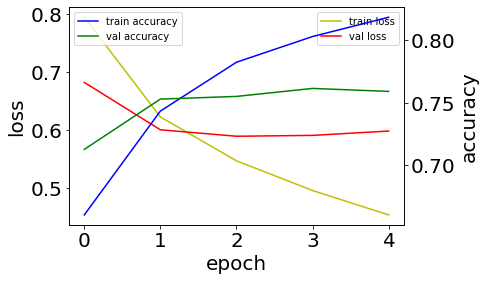

In [ ]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper right')

acc_ax.plot(history.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val accuracy')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')


plt.show()

## 채용 기사 데이터

In [ ]:
with tf.device('/device:GPU:0'):
    optimizer = tf.keras.optimizers.Adam(1e-5)
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    
    metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
    model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

    NUM_EPOCHS = 5
    
    history = model.fit(train_data_encoded_only_hire, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_data=test_data_encoded_only_hire)



Epoch 1/5
191/191 [==============================] - 194s 904ms/step - loss: 0.7931 - accuracy: 0.6745 - val_loss: 0.7448 - val_accuracy: 0.7160
Epoch 2/5
191/191 [==============================] - 171s 897ms/step - loss: 0.6339 - accuracy: 0.7426 - val_loss: 0.6183 - val_accuracy: 0.7598
Epoch 3/5
191/191 [==============================] - 171s 895ms/step - loss: 0.5671 - accuracy: 0.7723 - val_loss: 0.5615 - val_accuracy: 0.7729
Epoch 4/5
191/191 [==============================] - 171s 896ms/step - loss: 0.5359 - accuracy: 0.7859 - val_loss: 0.5890 - val_accuracy: 0.7546
Epoch 5/5
191/191 [==============================] - 171s 896ms/step - loss: 0.4903 - accuracy: 0.8058 - val_loss: 0.6223 - val_accuracy: 0.7507


In [ ]:
torch.save(model, "./bert_model_only_hire.bin")

In [ ]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper right')

acc_ax.plot(history.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val accuracy')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')


plt.show()

## 긍정부정 + 전체 데이터

In [ ]:
with tf.device('/device:GPU:0'):
    optimizer = tf.keras.optimizers.Adam(1e-5)
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    
    metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
    model_PN.compile(optimizer=optimizer, loss=loss, metrics=[metric])

    NUM_EPOCHS = 5
    
    history = model_PN.fit(train_data_encoded_all_PN, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_data=test_data_encoded_all_PN)



Epoch 1/5
208/208 [==============================] - 209s 894ms/step - loss: 0.5302 - accuracy: 0.7256 - val_loss: 0.3084 - val_accuracy: 0.8745
Epoch 2/5
208/208 [==============================] - 186s 894ms/step - loss: 0.3005 - accuracy: 0.8798 - val_loss: 0.2591 - val_accuracy: 0.9005
Epoch 3/5
208/208 [==============================] - 186s 893ms/step - loss: 0.2405 - accuracy: 0.9048 - val_loss: 0.3017 - val_accuracy: 0.8812
Epoch 4/5
208/208 [==============================] - 186s 895ms/step - loss: 0.2030 - accuracy: 0.9262 - val_loss: 0.2855 - val_accuracy: 0.8987
Epoch 5/5
208/208 [==============================] - 186s 895ms/step - loss: 0.1686 - accuracy: 0.9377 - val_loss: 0.3658 - val_accuracy: 0.8733


In [ ]:
#torch.save(model, "./bert_model_all_PN.bin")
model_PN.save_pretrained('model.h5')

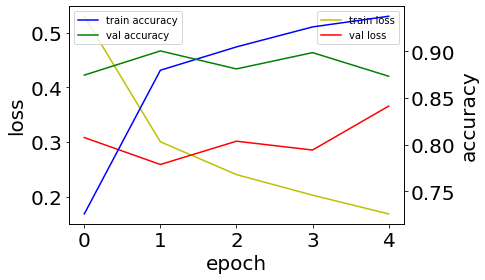

In [ ]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper right')

acc_ax.plot(history.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val accuracy')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')


plt.show()

## 긍정부정 + 채용기사 데이터

In [ ]:
with tf.device('/device:GPU:0'):
    optimizer = tf.keras.optimizers.Adam(1e-5)
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    
    metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
    model_PN.compile(optimizer=optimizer, loss=loss, metrics=[metric])

    NUM_EPOCHS = 10
    
    history = model_PN.fit(train_data_encoded_only_hire_PN, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_data=test_data_encoded_only_hire_PN)



Epoch 1/10
158/158 [==============================] - 162s 913ms/step - loss: 0.0785 - accuracy: 0.9721 - val_loss: 0.1652 - val_accuracy: 0.9359
Epoch 2/10
158/158 [==============================] - 142s 898ms/step - loss: 0.0611 - accuracy: 0.9786 - val_loss: 0.1531 - val_accuracy: 0.9502
Epoch 3/10
158/158 [==============================] - 142s 896ms/step - loss: 0.0473 - accuracy: 0.9826 - val_loss: 0.2163 - val_accuracy: 0.9343
Epoch 4/10
158/158 [==============================] - 142s 897ms/step - loss: 0.0444 - accuracy: 0.9844 - val_loss: 0.2119 - val_accuracy: 0.9462
Epoch 5/10
158/158 [==============================] - 142s 897ms/step - loss: 0.0372 - accuracy: 0.9881 - val_loss: 0.1942 - val_accuracy: 0.9470
Epoch 6/10
158/158 [==============================] - 142s 896ms/step - loss: 0.0409 - accuracy: 0.9860 - val_loss: 0.2196 - val_accuracy: 0.9391
Epoch 7/10
158/158 [==============================] - 142s 897ms/step - loss: 0.0296 - accuracy: 0.9895 - val_loss: 0.3184 -

In [ ]:
#torch.save(model, "./bert_model_all_PN.bin")
model_PN.save_pretrained('/content/drive/MyDrive/기업 뉴스 감성분석/model/bert_only_PN_epoch_10')

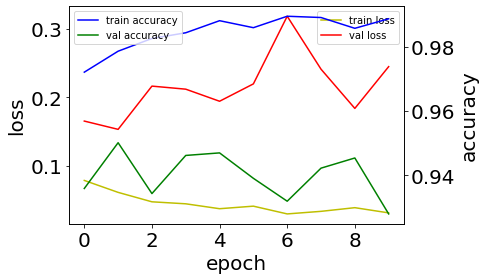

In [ ]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper right')

acc_ax.plot(history.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val accuracy')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')


plt.show()

## epoch 2

In [ ]:
with tf.device('/device:GPU:0'):
    optimizer = tf.keras.optimizers.Adam(1e-5)
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    
    metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
    model_PN.compile(optimizer=optimizer, loss=loss, metrics=[metric])

    NUM_EPOCHS = 5
    
    history = model_PN.fit(train_data_encoded_only_hire_PN, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_data=test_data_encoded_only_hire_PN)

Epoch 1/5
158/158 [==============================] - 169s 915ms/step - loss: 0.2159 - accuracy: 0.9165 - val_loss: 0.2041 - val_accuracy: 0.9256
Epoch 2/5
158/158 [==============================] - 142s 897ms/step - loss: 0.1892 - accuracy: 0.9286 - val_loss: 0.2257 - val_accuracy: 0.9241
Epoch 3/5
158/158 [==============================] - 141s 894ms/step - loss: 0.1485 - accuracy: 0.9456 - val_loss: 0.2209 - val_accuracy: 0.9304
Epoch 4/5
158/158 [==============================] - 141s 893ms/step - loss: 0.1353 - accuracy: 0.9490 - val_loss: 0.2372 - val_accuracy: 0.9185
Epoch 5/5
158/158 [==============================] - 141s 893ms/step - loss: 0.1113 - accuracy: 0.9598 - val_loss: 0.2542 - val_accuracy: 0.9201


In [ ]:
model_PN.save_pretrained('/content/drive/MyDrive/기업 뉴스 감성분석/model/bert_only_PN_epoch_5')

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()